In [ ]:
import pandas as pd

df = pd.DataFrame([
    { 'a': 0, 'b': 0, 'c': 0 },
    { 'a': 2, 'b': 1.5, 'c': 2.5 },
    { 'a': 5, 'b': 1.2, 'c': 1 },
    { 'a': 1, 'b': 1.1, 'c': 6 },
    { 'a': 2.2, 'b': 8, 'c': 0.2 },
    { 'a': 2.9, 'b': 0.4, 'c': 0 },
])

df['normalized_a'] = (df['a'] - df['a'].min()) / (df['a'].max() - df['a'].min())

print(df['normalized_a'])

from lib.data.features.transform import max_min_normalize

df_max_min = max_min_normalize(df)
df_max_min_list = max_min_normalize(df.values)

print(df_max_min)
print(df_max_min_list)

In [ ]:
from lib.data.providers import ProviderDateFormat, StaticDataProvider
from lib.data.features.transform import max_min_normalize, log_and_difference

data_columns = {'Date': 'Date', 'Open': 'Open', 'High': 'High',
                            'Low': 'Low', 'Close': 'Close', 'Volume': 'VolumeFrom'}

provider = StaticDataProvider(date_format=ProviderDateFormat.DATETIME_HOUR_24,
                              csv_data_path="/Users/Adam/Desktop/YouTube/BitcoinTrader/data/input/coinbase-1d-btc-usd.csv",
                              data_columns=data_columns)

print(provider.data_frame.head())

logged_and_diffed = log_and_difference(provider.data_frame)

print(logged_and_diffed.head())

normalized = max_min_normalize(provider.data_frame)

print(normalized.head())

In [ ]:
import numpy as np

from lib.data.features.transform import log_and_difference, max_min_normalize, difference

items = [1, -2, 3, 4, 5]

diffed = difference(items, inplace=False)

print(diffed)

normed = max_min_normalize(logged)

print(normed)

raveled = np.ravel(normed, order='F')

print(raveled)

In [ ]:
# Source: https://jtsulliv.github.io/stock-movement/

import numpy as np
import matplotlib.pyplot as plt

seed = 5      
N  = 2.**6     # increments

def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b

# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,N+1)
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

So = 55.25
mu = 0.15
sigma = 0.4
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

soln = GBM(So, mu, sigma, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sigma, W, T, N)[1]       # time increments for  plotting

plt.plot(t, soln)
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion')

plt.show()

                         open      high       low     close
1970-01-01 00:00:00  0.000000  0.022331 -0.093334 -0.093334
1970-01-01 00:01:00 -0.094703 -0.092502 -0.166598 -0.108964
1970-01-01 00:02:00 -0.109905 -0.048008 -0.141646 -0.057921
1970-01-01 00:03:00 -0.057029  0.014085 -0.101504  0.014085
1970-01-01 00:04:00  0.019500  0.040537 -0.023780  0.033475
1970-01-01 00:00:00   -0.431402
1970-01-01 00:01:00    0.101926
1970-01-01 00:02:00    0.109956
1970-01-01 00:03:00   -3.048878
1970-01-01 00:04:00   -6.020942
Freq: T, Name: Volume, dtype: float64


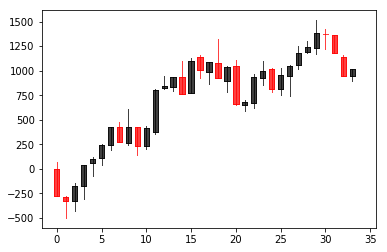

In [2]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc

from lib.data.providers import ProviderDateFormat, SimulatedDataProvider

provider = SimulatedDataProvider(ProviderDateFormat.TIMESTAMP_MS)

fig, ax = plt.subplots()
candlestick2_ohlc(ax,provider.data_frame['Open'], provider.data_frame['High'], provider.data_frame['Low'], provider.data_frame['Close'], width=0.6)
plt.show()